# РЕШАЮЩИЕ ДЕРЕВЬЯ ДЛЯ ЗАДАЧИ КЛАССИФИКАЦИИ

In [190]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

<ipython-input-191-23f9ac4017f6>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')


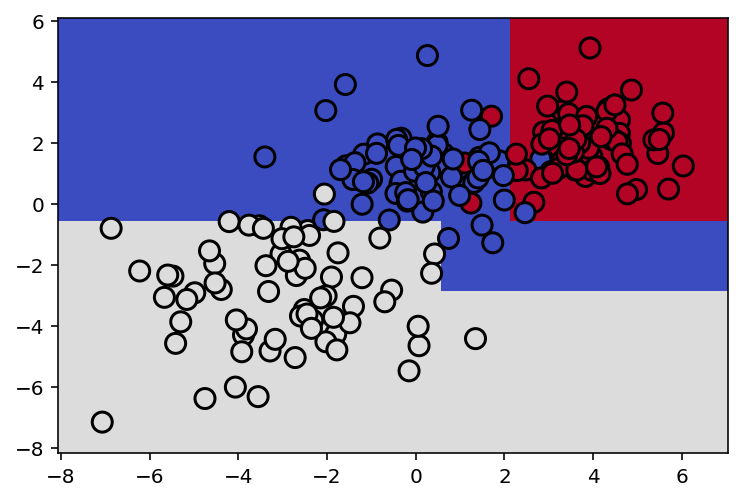

In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

Вам предложен датасет с некоторыми характеристиками банкнот, по которым мы будем определять, является ли банкнота фальшивой или настоящей.

Параметры решающего дерева, которые понадобятся для решения задачи:

`max_depth` — максимальная глубина дерева.   
`max_features` — максимальное число признаков, по которым ищется лучшее разбиение в дереве. Это нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.   
`min_samples_leaf` — минимальное число объектов в листе. У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов.   

In [192]:
data = pd.read_csv('./Unit_7_data/bill_authentication.csv')

## Задание 5.2.3
Обучите на предложенных данных решающее дерево. Целевой переменной здесь является переменная `Class`. Размер тестовой выборки возьмите за **0.2**, **random_state = 17** для разбиения и дерева. Максимальную глубину дерева примите за **3**, максимальное число признаков, по которым ищется лучшее разбиение в дереве — за **2**. Какое значение f1-score вы получили? Округлите до трёх знаков после точки-разделителя.

In [193]:
X, y= data.drop(columns='Class').values, data.Class.values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state = 17 )

In [194]:
model  = DecisionTreeClassifier(max_depth=3,max_features=2,random_state = 17)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=2, random_state=17)

In [195]:
y_pred = model.predict(X_test)
ans = f1_score(y_test,y_pred)

In [196]:
round(ans,3)

0.866

## Задание 5.2.4
Проклассифицируйте банкноту с вектором признаков ***2.04378,-0.38422,1.437292,0.76421.*** К какому классу она относится?

In [197]:
feats = np.array([[2.04378,-0.38422,1.437292,0.76421]])
model.predict(feats)[0]

0

# РЕШАЮЩИЕ ДЕРЕВЬЯ В ЗАДАЧЕ РЕГРЕССИИ

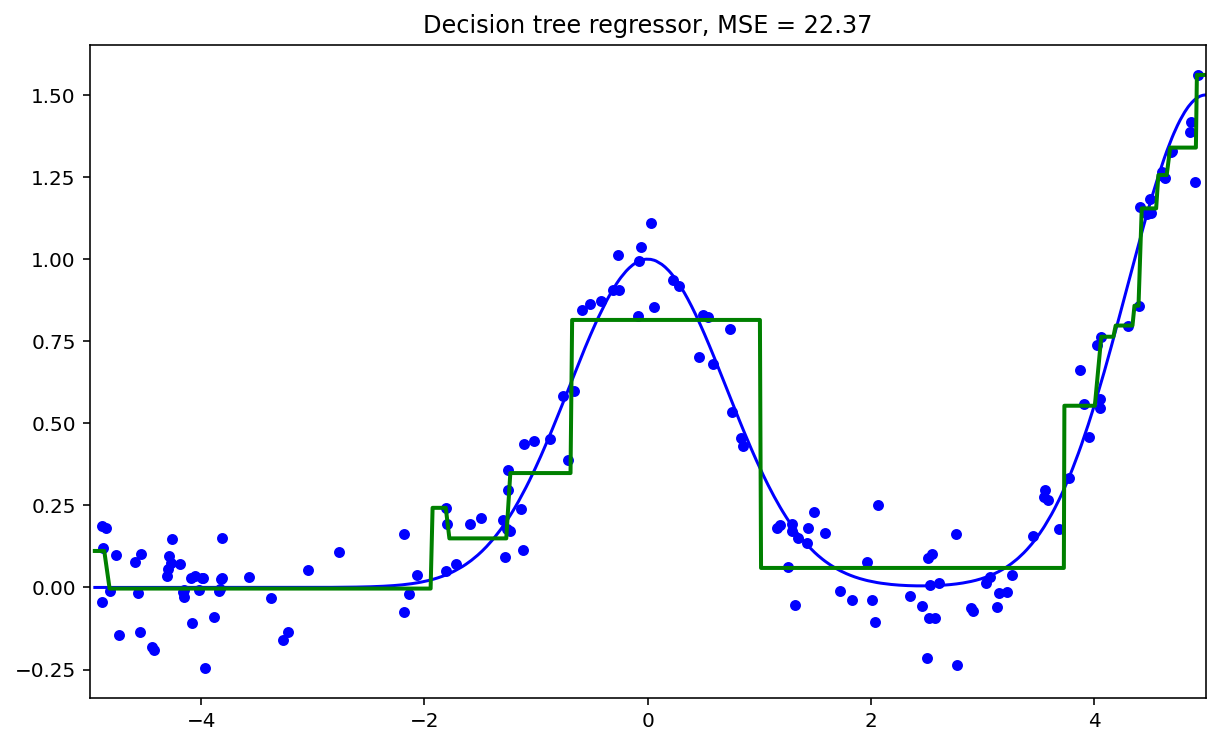

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=RANDOM_SEED)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

БОРЬБА С ПЕРЕОБУЧЕНИЕМ (РЕГУЛЯРИЗАЦИЯ)

Приведём несколько возможных способов сделать алгоритм более обобщающим, т.е. менее заточенным под конкретную выборку:

- Задать порог по мере неопределённости $I(S) \leq \theta$: 
- Задать порог по размеру узла:$\left |S \right | \leq n$ 
- Задать порог на глубину: $Depth(T)=d$
- Задать порог на размер потомков $\left | S_L \right |\leq n_1$ & $\left | S_R \right | \leq n_2$, здесь $S$ — это узел дерева, $T$  — дерево, $\left | S_R \right | \leq n_2$ — количество элементов в узле, $S_L, S_R$ — соответственно правый и левый потомок узла $s$ .




# ЗАДАЧА О ПОТРЕБЛЕНИИ ТОПЛИВА

![](https://lms.skillfactory.ru/assets/courseware/v1/ed0db361d56c96e2781ff6dd393e616b/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/eastwood-downloading.png)

Потренируемся реализовывать задачу регрессии с помощью решающих деревьев на реальных данных. В данной задаче мы попробуем предсказать потребление топлива

## Задание 5.2.5
Обучите решающее дерево для регрессии на предложенных данных, размер тестовой выборки возьмите за **0.3**, **random_state = 42** для разбиения и дерева. Вычислите `RMSE`, округлите до *двух знаков* после точки-разделителя.

In [199]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [200]:
data = pd.read_csv('./Unit_7_data/petrol_consumption.csv')

In [201]:
X,y = data.drop(columns='Petrol_Consumption'),data.Petrol_Consumption

In [202]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state = 42)

In [203]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [204]:
y_pred = model.predict(X_test)

In [205]:
ans = np.sqrt(mean_squared_error(y_test,y_pred))
round(ans,2)

87.97

In [206]:
model.get_depth()

11

# ЗАДАЧА О ВИНАХ
Реализуем бэггинг для деревьев решений. Для тренировки будем использовать датасет о винах. 



Датасет можно скачать [здесь](https://lms.skillfactory.ru/assets/courseware/v1/2daeecee174368f8a33b82c8cccae3a5/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/winequality-red.csv).

Для начала подготовим данные к классификации. Условно разделим вино на хорошее и нет. Хорошим вином будем называть вино, параметр ***quality*** которого не менее ***6***.

Теперь сравним несколько методов классификации: логистическую регрессию, решающее дерево и бэггинг.

Разбейте выборку на обучающую и тренировочную с параметрами `test_size=0.30, random_state=42`.

Обучите два классификатора: **логистическую регрессию** (с дефолтными параметрами) и **решающее дерево** ***(random_state=42, максимальная глубина равна 10)***.

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [208]:
data = pd.read_csv('./Unit_7_data/winequality-red.csv',sep=';')

X, y = data.drop(columns='quality'), (data.quality<6).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [209]:
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=42, max_depth=10)

lr.fit(X_train,y_train)
dt.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test.values)
y_pred_dt = dt.predict(X_test.values)

metrica_lr = f1_score(y_test,y_pred_lr)
metric_dt = f1_score(y_test,y_pred_dt)
metrica_lr,metric_dt

C:\Users\Manych\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.6990740740740741, 0.7035175879396987)

In [210]:
ans = max(metrica_lr,metric_dt)
ans

0.7035175879396987

Обучите модель с использование бэггинга (функция `BaggingClassifier` с **random_state=42**, разделение выборки на обучающую и тренировочную с параметрами **test_size=0.30, random_state=42**) для алгоритма, показавшего лучшее качество, определите количество моделей **1500**. Вычислите новое значение **f1-score**.

In [211]:
data = pd.read_csv('./Unit_7_data/winequality-red.csv',sep=';')

X, y = data.drop(columns='quality'), (data.quality<6).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [212]:
bgc = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42, max_depth=10),
                        random_state=42,
                        n_estimators = 1500 )

In [213]:
bgc.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        random_state=42),
                  n_estimators=1500, random_state=42)

In [214]:
y_pred_bgc = bgc.predict(X_test)

In [215]:
f1_score(y_test,y_pred_bgc)

0.7777777777777778

# 5.6. Случайный лес
## РЕАЛИЗАЦИЯ НА PYTHON  И ПОДБОР ПАРАМЕТРОВ
Теперь обучим случайный лес на простых данных и посмотрим, как можно подбирать параметры случайного леса для достижения наилучшего качества модели.

Потренируемся на данных, по которым мы будем предсказывать погоду

Откроем его, удалим признаки, не относящиеся к предсказанию (от дня недели, например, или от года погода не зависит), разделим на тестовую и обучающуюся выборки:

In [216]:
weather=pd.read_csv('./Unit_7_data/temps_extended.csv')
y = weather['actual']
X = weather.drop(['actual','weekday','month','day','year'],axis =1)
X_train, X_val, Y_train, Y_val=train_test_split(X,y,test_size=0.3, random_state=42)

Попробуем подобрать гиперпараметры таким образом, чтобы получить оптимальный результат.

Если мы запускаем случайный лес без настройки параметров, то по умолчанию они следующие:

In [217]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Параметры по умолчанию:\n')
pprint(rf.get_params())

Параметры по умолчанию:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Попробуем подбирать разные значения для некоторых параметров. Для перебора вариантов возьмем следующие параметры:

- n_estimators 
- max_features 
- max_depth 
- min_samples_split 
- min_samples_leaf
- bootstrap

Мы можем сами указать, какие значения гиперпараметров надо перебрать.

Зададим сетку гиперпараметров, которые будут перебираться:

In [218]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Обучим наш лес:

In [219]:
%%time
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Wall time: 5min 1s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [220]:
Давайте посмотрим, какие гиперпараметры нам предлагают как оптимальные:

SyntaxError: invalid syntax (<ipython-input-220-4adaa7943917>, line 1)

In [ ]:
rf_random.best_params_

## Задание 5.6.1
Обучите случайный лес с предустановленными параметрами и теми параметрами, которые мы отобрали как оптимальные. В обоих вариантах поставьте `random_state =42`. Какое улучшение `MSE` дала подстановка отобранных гиперпараметров? Ответ округлите до одного знака после запятой.

In [ ]:
bs = rf_random.best_estimator_
rf = RandomForestRegressor(random_state = 42)

bs.fit(X_train,Y_train)
rf.fit(X_train,Y_train)

Y_pred_bs = bs.predict(X_val)
Y_pred_rf = rf.predict(X_val)

mse_bs = mean_squared_error(Y_val,Y_pred_bs)
mse_rf = mean_squared_error(Y_val,Y_pred_rf)

ans = mse_rf - mse_bs
round(ans,1)

# 5.7. Практика
Разберёмся с **ансамблями алгоритмов** и со **случайным лесом**. Рассмотрим данные о сотрудниках компании, где указывается, ушёл сотрудник или нет.

Сделаем **базовую предобработку данных**: удалим признак, который отвечает за идентификатор пользователя, как нерепрезентативный признак.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('./Unit_7_data/HR-dataset.csv')

np.random.seed(42)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

target = 'left'
features = df.columns.drop(target)
features = features.drop('empid')  # Удалим идентификатор пользователя как нерепрезентативный признак
print(features)

X, y = df[features].copy(), df[target]

Заменим идентификатор отдела, к которому относился сотрудник, на количество людей в отделе, а зарплату — на ординальную категорию. 

In [ ]:
salary_ordinals = {'low': 1, 'medium': 2, 'high': 3}

X['dept'] = X['dept'].apply(X['dept'].value_counts().get)
X['salary'] = X['salary'].apply(salary_ordinals.get)

Масштабируем признаки для последующего сравнения результатов:

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

В дальнейшем будем оценивать качество модели на кросс-валидации на пяти фолдах при помощи точности ($accuracy$).

In [ ]:
def estimate_accuracy(clf, X, y, cv=5):
    return cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()

Посмотрим на то, как работает бэггинг над решающими деревьями.

```
Бэггинг (bagging, сокр. от bootstrap aggregating*)  — метод построения композиции алгоритмов, в котором каждый алгоритм строится независимо от других на подвыборках обучающей выборки. Итоговый алгоритм принимает решения посредством голосования среди всех алгоритмов (возвращается самый частый ответ).
```
Посмотрим на точность одного дерева:

In [ ]:
tree = DecisionTreeClassifier(max_depth=30)
print("Decision tree:", estimate_accuracy(tree, X, y))

Проведём бэггинг: для этого достаточно обернуть исходный классификатор в BaggingClassifier.

In [ ]:
bagging_trees = BaggingClassifier(tree)
print("Decision tree bagging:", estimate_accuracy(bagging_trees, X, y))

Стандартная эвристика: в задаче классификации брать квадратный корень числа признаков, а в задаче регрессии — треть числа признаков.

In [ ]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    max_features=int(np.sqrt(len(features))),
    max_depth=30)
print("Random Forest:", estimate_accuracy(random_forest, X, y))

Ещё одно преимущество использования бэггинга для агрегации моделей — получение оценки работы классификатора без дополнительного проведения кросс-валидации при помощи `out-of-bag scor`. Это метод вычисления произвольной оценки качества во время обучения бэггинга. Для подсчёта требуется указать параметр `oob_score = True`, что имеет смысл при достаточном количестве деревьев.

In [ ]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_features=int(np.sqrt(len(features))),
    max_depth=30,
    oob_score=True,
    n_jobs=-1
)
random_forest.fit(X, y)
random_forest.oob_score_.mean()

Метод бэггинга можно применять к **произвольным алгоритмам**, например, к логистической регрессии. 

In [ ]:
lr = LogisticRegression(solver='saga', max_iter=200)
lr.fit(X, y)
print("LR:", estimate_accuracy(lr, X, y))

In [ ]:
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

В её случае он не так сильно повышает качество, поскольку линейные модели не так сильно зависят от состава обучающей выборки. Попробуем убрать часть признаков.

In [ ]:
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    max_features=0.5,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

В случае логистической регрессии повышение разнообразности моделей не даёт такого прироста, как с деревьями, поскольку модели сильно теряют в качестве. Случайный лес на примере нашей задачи справляется лучше.

Сравнение логистической регрессии и случайного леса:

In [ ]:
def plot_predictions(X, y, clf, proba=False, points_size=7, xlabel='x', ylabel='y'):
    """Fits the classifier on the data (X, y) and plots the result on a 2-D plane."""
    def get_grid(data):
        x_std, y_std = data.std(axis=0)
        x_min, x_max = data[:, 0].min() - x_std / 2, data[:, 0].max() + x_std / 2
        y_min, y_max = data[:, 1].min() - y_std / 2, data[:, 1].max() + y_std / 2
        return np.meshgrid(np.linspace(x_min, x_max, num=200),
                           np.linspace(y_min, y_max, num=200))
    
    clf.fit(X, y)
    xx, yy = get_grid(X)
    if proba:
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
    plt.figure(figsize=(10.0, 10.0))
    plt.pcolormesh(xx, yy, predicted, cmap=plt.cm.coolwarm, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=points_size, cmap=plt.cm.coolwarm, alpha=0.90)
    plt.ylim([yy.min(),yy.max()])
    plt.xlim([xx.min(),xx.max()])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return clf

# ПРАКТИКА

1. Загрузите датасет **digits** с помощью функции `load_digits` из `sklearn.datasets` и подготовьте матрицу признаков **X** и ответы на обучающей выборке **y** (вам потребуются поля **data** и **target** в объекте, который возвращает `load_digits`). 

2. Информацию о датасете вы можете получить, обратившись к полю `DESCR` у возвращаемого объекта `load_digits`. Нам предстоит решать задачу классификации изображений с цифрами по численным признакам.

3. Для оценки качества мы будем использовать `cross_val_score` из `sklearn.model_selection` с параметром **cv = 10**. Эта функция реализует **k-fold cross validation c k** равным значению параметра **cv** . Предлагается использовать **k=10**, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и **k=5**. Функция `cross_val_score` будет возвращать `numpy.ndarray`, в котором будет **k** чисел — качество в каждом из  **k** экспериментов `k-fold cross validation`. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод `.mean()` у массива, который возвращает `cross_val_score`.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадёт в диапазон, заданный для правильных ответов — в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Чтобы ускорить вычисление cross_val_score, следует попробовать использовать параметр `n_jobs`. Число, которое вы подаёте в качестве этого параметра, соответствует количеству потоков вашего процессора, которое будет задействовано в вычислении. Если указать `n_jobs = -1`, тогда будет задействовано максимальное число потоков.

In [223]:
from sklearn.datasets import load_digits


In [224]:
data = load_digits()
X, y =data.data, data.target

In [242]:
# print(data.DESCR)

## Задание 5.7.1
### 1. 
Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score.

Эту величину введите в поле для ответа (ваше значение должно попасть в заданный интервал).

In [258]:
dtc = DecisionTreeClassifier()
metrics = cross_val_score(dtc, X, y, cv = 10, n_jobs = -1)
metrics.mean()

0.8280446927374301

### 2. 
Теперь давайте обучим `BaggingClassifier` на основе` DecisionTreeClassifier`. Из `sklearn.ensemble` импортируйте `BaggingClassifier`, все параметры задайте по умолчанию. Нужно изменить только количество базовых моделей, задав его равным **100**.

В поле для ответа введите качество работы получившегося классификатора (ваше значение должно попасть в заданный интервал).

Подумайте, какие выводы можно сделать из соотношения качества одиночного дерева и бэггинга деревьев?

In [250]:
from sklearn.ensemble import BaggingClassifier

In [262]:
bgc = BaggingClassifier(base_estimator=dtc, n_estimators=100)
metrics = cross_val_score(bgc, X, y, cv = 10, n_jobs = -1)
metrics.mean()

0.924832402234637

### 3. 
Теперь изучите параметры `BaggingClassifier` и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех **d** признаках, а на **sqrt{d}** случайных признаках.

В поле для ответа введите качество работы получившегося классификатора (ваше значение должно попасть в заданный интервал).

Корень из числа признаков — часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три, $log{d}$ тоже имеет место быть. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков, добиваясь лучшего качества на кросс-валидации

In [269]:
n_feat = X.shape[1]

bgc_sqrt = BaggingClassifier(base_estimator=dtc, n_estimators=100, max_features=int(np.sqrt(n_feat)))
metrics = cross_val_score(bgc_sqrt, X, y, cv = 10, n_jobs = -1)
metrics.mean()

0.9293234016139046

### 4. 
В предыдущем пункте мы выбирали подмножество один раз для каждого очередного дерева. Следующим нашим шагом будет построение бэггинга на основе деревьев, которые выбирают случайное подмножество признаков для каждой вершины дерева.

Для этого нам потребуется перенести отвечающий за это параметр из `BaggingClassifier` в `DecisionTreeClassifier`. Для этого вам из документации нужно выяснить, какой параметр `DecisionTreeClassifier` за это отвечает.

В поле для ответа введите значение этого параметра (ваше значение должно попасть в заданный интервал).

По-прежнему сэмплируем **sqrt(d)** признаков.

In [270]:
dtc_sqrt = DecisionTreeClassifier(max_features="sqrt")
bgc_dtc_sqrt = BaggingClassifier(base_estimator=dtc_sqrt, n_estimators=100)
metrics = cross_val_score(bgc_dtc_sqrt, X, y, cv = 10, n_jobs = -1)
metrics.mean()

0.952129112352576